# INFO 2950 Project Phase II

#### Import needed packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## I. Research Question(s)

At Walt Disney World:
 -  What time of day is most popular for certain rides?

 - What day of the week/month of the year is typically most crowded?

 - What ride is the most popular?

 - How does weather (average temperature and precipitation) affect wait times?

 - How do holidays affect wait times? What holiday affects wait times the most?
 
 - How does the percentage of schools in session affect wait times?

## II. Data Collection and Cleaning

### 1. Load in data

The below data files were found at the following link: https://touringplans.com/blog/2018/06/25/disney-world-wait-times-available-for-data-science-and-machine-learning/

In [2]:
#load metadata csv file
metadata = pd.read_csv('metadata.csv')

#load csv files of each attraction
dwarfs_train = pd.read_csv('7_dwarfs_train.csv')
#alien_saucers = pd.read_csv('alien_saucers.csv')
dinosaur = pd.read_csv('dinosaur.csv')
expedition_everest = pd.read_csv('expedition_everest.csv')
#flight_of_passage = pd.read_csv('flight_of_passage.csv')
kilimanjaro_safaris = pd.read_csv('kilimanjaro_safaris.csv')
#navi_river = pd.read_csv('navi_river.csv')
pirates_of_caribbean = pd.read_csv('pirates_of_caribbean.csv')
rock_n_rollercoaster = pd.read_csv('rock_n_rollercoaster.csv')
#slinky_dog = pd.read_csv('slinky_dog.csv')
soarin = pd.read_csv('soarin.csv')
spaceship_earth = pd.read_csv('spaceship_earth.csv')
splash_mountain = pd.read_csv('splash_mountain.csv')
toy_story_mania = pd.read_csv('toy_story_mania.csv')

### 2. Data Cleaning

Of the attraction wait times data files provided, I chose to keep only those attractions that were around and functioning in 2015, which is when most of the data begins. Therefore, I will not include the following rides in my analysis: **Alien Swarling Saucers, Avatar Flight of Passage, Na'vi River Journey, and Slinky Dog Dash**. 

In [3]:
dwarfs_train.head()

,date,datetime,SACTMIN,SPOSTMIN
0,01/01/2015,2015-01-01 07:51:12,NaN,45.0
1,01/01/2015,2015-01-01 08:02:13,NaN,60.0
2,01/01/2015,2015-01-01 08:05:30,54.0,NaN
3,01/01/2015,2015-01-01 08:09:12,NaN,60.0
4,01/01/2015,2015-01-01 08:16:12,NaN,60.0


When going through the datasets for each attraction, I noticed they have different reporting times and number of reports per day. Therefore, in order to merge the attraction wait times into one data frame, I will get an average hourly wait time for each hour that the park is open. I will only look at normal park hours; I am choosing to ignore wait time data for Extra Magic Hours, which are hours the parks are open only for specific guests. To further simplify, I will ignore any hours after midnight that the park is open. For example, on certain holidays, the parks are open past midnnight. This will complicate date analysis, so I am choosing to ignore this data. 

In addition, to simplify analyses, I am ony going to look at `SPOSTMIN`, the posted wait time in minutes. I am going to ignore, and get rid of, `SACTMIN`, the actual wait time in minutes, because besides a few occurrences, this column is empty. 

**Step 1:** 
 - Create new attraction datasets with only `datetime` and `SPOSTMIN` columns. 
 - Get rid of NaN values in `SPOSTMIN` columns (only occurs when `SACTMIN` is reported instead). There are enough wait times to analyze already, so I do not consider this a big deal. 

In [4]:
dwarfs_train_clean = dwarfs_train[['datetime', 'SPOSTMIN']].dropna().copy()
dinosaur_clean = dinosaur[['datetime', 'SPOSTMIN']].dropna().copy()
expedition_everest_clean = expedition_everest[['datetime', 'SPOSTMIN']].dropna().copy()
kilimanjaro_safaris_clean = kilimanjaro_safaris[['datetime', 'SPOSTMIN']].dropna().copy()
pirates_of_caribbean_clean = pirates_of_caribbean[['datetime', 'SPOSTMIN']].dropna().copy()
rock_n_rollercoaster_clean = rock_n_rollercoaster[['datetime', 'SPOSTMIN']].dropna().copy()
soarin_clean = soarin[['datetime', 'SPOSTMIN']].dropna().copy()
spaceship_earth_clean = spaceship_earth[['datetime', 'SPOSTMIN']].dropna().copy()
splash_mountain_clean = splash_mountain[['datetime', 'SPOSTMIN']].dropna().copy()
toy_story_mania_clean = toy_story_mania[['datetime', 'SPOSTMIN']].dropna().copy()

**Step 2:**
 - Convert `datetime` column from type string to datetime
 - From this datetime object, split into two new columns `date` and `hour_of_day`. This will make it easier to get the average wait time each hour of every day. 

In [5]:
#Function to change datetime column to type datetime
def change_to_datetime(ride):
    '''
    param ride: the Dataframe to change the datetime column to type datetime
    '''
    ride.loc[:, 'datetime'] = pd.to_datetime(ride.datetime, format="%Y-%m-%d %H:%M:%S")
    ride['date'] = ride.datetime.dt.date
    ride['hour_of_day'] = ride.datetime.dt.hour

In [6]:
#Create new list of all clean data for each ride
all_rides_clean = [dwarfs_train_clean, dinosaur_clean, expedition_everest_clean, kilimanjaro_safaris_clean,
        pirates_of_caribbean_clean, rock_n_rollercoaster_clean, soarin_clean, spaceship_earth_clean,
        splash_mountain_clean, toy_story_mania_clean]

#Call above function to change datetime column to type datetime
for ride in all_rides_clean:
    change_to_datetime(ride)

In [7]:
dwarfs_train_clean.head()

,datetime,SPOSTMIN,date,hour_of_day
0,2015-01-01 07:51:12,45.0,2015-01-01,7
1,2015-01-01 08:02:13,60.0,2015-01-01,8
3,2015-01-01 08:09:12,60.0,2015-01-01,8
4,2015-01-01 08:16:12,60.0,2015-01-01,8
6,2015-01-01 08:23:12,60.0,2015-01-01,8


**Step 3:**
 - Reorganize dataframes for each attraction so the columns are in order: `date`, `hour_of_day`, and `SPOSTMIN`
 - Rename the `SPOSTMIN` column to `wait_time` to make the column name more explanatory

In [8]:
#Reorganize dataframes to date, hour, wait_time
dwarfs_train_hourly = dwarfs_train_clean[['date', 'hour_of_day', 'SPOSTMIN']].copy()
dinosaur_hourly = dinosaur_clean[['date', 'hour_of_day', 'SPOSTMIN']].copy()
expedition_everest_hourly = expedition_everest_clean[['date', 'hour_of_day', 'SPOSTMIN']].copy()
kilimanjaro_safaris_hourly = kilimanjaro_safaris_clean[['date', 'hour_of_day', 'SPOSTMIN']].copy()
pirates_of_caribbean_hourly = pirates_of_caribbean_clean[['date', 'hour_of_day', 'SPOSTMIN']].copy()
rock_n_rollercoaster_hourly = rock_n_rollercoaster_clean[['date', 'hour_of_day', 'SPOSTMIN']].copy()
soarin_hourly = soarin_clean[['date', 'hour_of_day', 'SPOSTMIN']].copy()
spaceship_earth_hourly = spaceship_earth_clean[['date', 'hour_of_day', 'SPOSTMIN']].copy()
splash_mountain_hourly = splash_mountain_clean[['date', 'hour_of_day', 'SPOSTMIN']].copy()
toy_story_mania_hourly = toy_story_mania_clean[['date', 'hour_of_day', 'SPOSTMIN']].copy()

In [9]:
def rename_columns(ride):
    ride.columns = ['date', 'hour_of_day', 'wait_time']

In [10]:
all_rides_hourly = [dwarfs_train_hourly, dinosaur_hourly, expedition_everest_hourly, kilimanjaro_safaris_hourly,
        pirates_of_caribbean_hourly, rock_n_rollercoaster_hourly, soarin_hourly, spaceship_earth_hourly,
        splash_mountain_hourly, toy_story_mania_hourly]

for ride in all_rides_hourly:
    rename_columns(ride)

**Step 4:** 
 - When an attraction was closed on certain days/times, `wait_time = -999.0`. This might skew analyses so I will get rid of any wait times less than zero.  

In [11]:
dwarfs_train_hourly2 = dwarfs_train_hourly[dwarfs_train_hourly.wait_time >=0]
dinosaur_hourly2 = dinosaur_hourly[dinosaur_hourly.wait_time >=0]
expedition_everest_hourly2 = expedition_everest_hourly[expedition_everest_hourly.wait_time >=0]
kilimanjaro_safaris_hourly2 = kilimanjaro_safaris_hourly[kilimanjaro_safaris_hourly.wait_time >=0]
pirates_of_caribbean_hourly2 = pirates_of_caribbean_hourly[pirates_of_caribbean_hourly.wait_time >=0]
rock_n_rollercoaster_hourly2 = rock_n_rollercoaster_hourly[rock_n_rollercoaster_hourly.wait_time >=0]
soarin_hourly2 = soarin_hourly[soarin_hourly.wait_time >=0]
spaceship_earth_hourly2 = spaceship_earth_hourly[spaceship_earth_hourly.wait_time >=0]
splash_mountain_hourly2 = splash_mountain_hourly[splash_mountain_hourly.wait_time >=0]
toy_story_mania_hourly2 = toy_story_mania_hourly[toy_story_mania_hourly.wait_time >=0]

**Step 5:**
 - Get the average wait time for each hour of every day using the `groupby()` function
 - Use `reset_index()` to convert this data back into a dataframe 

In [12]:
dwarfs_train_hourly_avg = dwarfs_train_hourly2.groupby(['date', 'hour_of_day']).mean().round(decimals=2)
dwarfs_train_hourly_avg = pd.DataFrame(dwarfs_train_hourly_avg.reset_index())

dinosaur_hourly_avg = dinosaur_hourly2.groupby(['date', 'hour_of_day']).mean().round(decimals=2)
dinosaur_hourly_avg = pd.DataFrame(dinosaur_hourly_avg.reset_index())

expedition_everest_hourly_avg = expedition_everest_hourly2.groupby(['date', 'hour_of_day']).mean().round(decimals=2)
expedition_everest_hourly_avg = pd.DataFrame(expedition_everest_hourly_avg.reset_index())

kilimanjaro_safaris_hourly_avg = kilimanjaro_safaris_hourly2.groupby(['date', 'hour_of_day']).mean().round(decimals=2)
kilimanjaro_safaris_hourly_avg = pd.DataFrame(kilimanjaro_safaris_hourly_avg.reset_index())

pirates_of_caribbean_hourly_avg = pirates_of_caribbean_hourly2.groupby(['date', 'hour_of_day']).mean().round(decimals=2)
pirates_of_caribbean_hourly_avg = pd.DataFrame(pirates_of_caribbean_hourly_avg.reset_index())

rock_n_rollercoaster_hourly_avg = rock_n_rollercoaster_hourly2.groupby(['date', 'hour_of_day']).mean().round(decimals=2)
rock_n_rollercoaster_hourly_avg = pd.DataFrame(rock_n_rollercoaster_hourly_avg.reset_index())

soarin_hourly_avg = soarin_hourly2.groupby(['date', 'hour_of_day']).mean().round(decimals=2)
soarin_hourly_avg = pd.DataFrame(soarin_hourly_avg.reset_index())

spaceship_earth_hourly_avg = spaceship_earth_hourly2.groupby(['date', 'hour_of_day']).mean().round(decimals=2)
spaceship_earth_hourly_avg = pd.DataFrame(spaceship_earth_hourly_avg.reset_index())

splash_mountain_hourly_avg = splash_mountain_hourly2.groupby(['date', 'hour_of_day']).mean().round(decimals=2)
splash_mountain_hourly_avg = pd.DataFrame(splash_mountain_hourly_avg.reset_index())

toy_story_mania_hourly_avg = toy_story_mania_hourly2.groupby(['date', 'hour_of_day']).mean().round(decimals=2)
toy_story_mania_hourly_avg = pd.DataFrame(toy_story_mania_hourly_avg.reset_index())

**Step 6:**
 - Add the initials of each attraction to the `wait_time` column name. This will distinguish each attraction when we merge the wait times together.

In [13]:
#Change wait_time column name to include attraction initials
dwarfs_train_hourly_avg.columns = ['date', 'hour_of_day', 'DT_wait_time']
dinosaur_hourly_avg.columns = ['date', 'hour_of_day', 'D_wait_time']
expedition_everest_hourly_avg.columns = ['date', 'hour_of_day', 'EE_wait_time']
kilimanjaro_safaris_hourly_avg.columns = ['date', 'hour_of_day', 'KS_wait_time']
pirates_of_caribbean_hourly_avg.columns = ['date', 'hour_of_day', 'POC_wait_time']
rock_n_rollercoaster_hourly_avg.columns = ['date', 'hour_of_day', 'RNR_wait_time']
soarin_hourly_avg.columns = ['date', 'hour_of_day', 'S_wait_time']
spaceship_earth_hourly_avg.columns = ['date', 'hour_of_day', 'SE_wait_time']
splash_mountain_hourly_avg.columns = ['date', 'hour_of_day', 'SM_wait_time']
toy_story_mania_hourly_avg.columns = ['date', 'hour_of_day', 'TSM_wait_time']

In [14]:
dwarfs_train_hourly_avg.head()

,date,hour_of_day,DT_wait_time
0,2015-01-01,7,45.00
1,2015-01-01,8,78.33
2,2015-01-01,9,103.33
3,2015-01-01,10,87.50
4,2015-01-01,11,85.56


Now we only want the hourly wait times for when the park was open for normal hours. Also, to make analyses easier, I am ignoring the hours past midnight so I can easily distinguish between different days. In order to do this, we need to use data from `metadata`.

**Step 7:**
 - Keep only the columns from `metadata` that I am interested in and might use in anlayses. These include `DATE`, `DAYOFWEEK`, `DAYOFYEAR`, `WEEKOFYEAR`, `MONTHOFYEAR`, `SEASON`, `HOLIDAYN`, `HOLIDAY`, `WDWMEANTEMP`, `INSESSION`, `MKOPEN`, `MKCLOSE`, `EPOPEN`, `EOPCLOSE`, `HSOPEN`, `HSCLOSE`, `AKOPEN`, `AKCLOSE`, `WEATHER_WDWPRECIP`

In [15]:
metadata_new = metadata[['DATE', 'DAYOFWEEK', 'DAYOFYEAR', 'WEEKOFYEAR', 'MONTHOFYEAR', 'SEASON', 'HOLIDAYN', 'HOLIDAY', 
                        'WDWMEANTEMP', 'inSession', 'MKOPEN', 'MKCLOSE', 'EPOPEN', 'EPCLOSE', 'HSOPEN', 'HSCLOSE', 'AKOPEN', 
                        'AKCLOSE', 'WEATHER_WDWPRECIP']].copy()

metadata_new

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,SEASON,HOLIDAYN,HOLIDAY,WDWMEANTEMP,inSession,MKOPEN,MKCLOSE,EPOPEN,EPCLOSE,HSOPEN,HSCLOSE,AKOPEN,AKCLOSE,WEATHER_WDWPRECIP
0,01/01/2015,5,0,0,1,CHRISTMAS PEAK,nyd,1,66.41,0%,8:00,25:00,8:00,21:00,8:00,22:00,8:00,19:00,0.12
1,01/02/2015,6,1,0,1,CHRISTMAS,NaN,0,69.36,0%,8:00,25:00,8:00,21:00,8:00,22:00,8:00,20:00,0.12
2,01/03/2015,7,2,0,1,CHRISTMAS,NaN,0,75.22,0%,9:00,25:00,9:00,21:00,9:00,22:00,8:00,19:00,0.07
3,01/04/2015,1,3,1,1,CHRISTMAS,NaN,0,75.95,67%,9:00,24:00,9:00,21:00,9:00,20:00,9:00,20:00,0.12
4,01/05/2015,2,4,1,1,CHRISTMAS,NaN,0,64.60,67%,9:00,23:00,9:00,21:00,9:00,20:00,9:00,17:00,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,12/26/2019,5,359,51,12,CHRISTMAS,NaN,0,63.53,0%,8:00,24:00,9:00,21:30,6:00,22:00,8:00,21:00,0.07
2128,12/27/2019,6,360,51,12,CHRISTMAS PEAK,NaN,0,54.72,0%,8:00,24:00,9:00,21:30,6:00,22:00,8:00,22:00,0.08
2129,12/28/2019,7,361,51,12,CHRISTMAS PEAK,NaN,0,56.74,0%,8:00,24:00,9:00,21:30,6:00,22:00,8:00,22:00,0.08
2130,12/29/2019,1,362,52,12,CHRISTMAS PEAK,NaN,0,56.74,0%,8:00,24:00,9:00,21:30,6:00,22:00,8:00,23:00,0.08


**Step 8:**
 - Change the type of the `DATE` column from string to a datetime object. Extract date part of it to compare with `date` column in attraction dataframes. 

In [16]:
#Change date to date object
metadata_new.loc[:, 'DATE'] = pd.to_datetime(metadata_new.DATE, format="%m/%d/%Y")
metadata_new['DATE'] = metadata_new.DATE.dt.date

metadata_new

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,SEASON,HOLIDAYN,HOLIDAY,WDWMEANTEMP,inSession,MKOPEN,MKCLOSE,EPOPEN,EPCLOSE,HSOPEN,HSCLOSE,AKOPEN,AKCLOSE,WEATHER_WDWPRECIP
0,2015-01-01,5,0,0,1,CHRISTMAS PEAK,nyd,1,66.41,0%,8:00,25:00,8:00,21:00,8:00,22:00,8:00,19:00,0.12
1,2015-01-02,6,1,0,1,CHRISTMAS,NaN,0,69.36,0%,8:00,25:00,8:00,21:00,8:00,22:00,8:00,20:00,0.12
2,2015-01-03,7,2,0,1,CHRISTMAS,NaN,0,75.22,0%,9:00,25:00,9:00,21:00,9:00,22:00,8:00,19:00,0.07
3,2015-01-04,1,3,1,1,CHRISTMAS,NaN,0,75.95,67%,9:00,24:00,9:00,21:00,9:00,20:00,9:00,20:00,0.12
4,2015-01-05,2,4,1,1,CHRISTMAS,NaN,0,64.60,67%,9:00,23:00,9:00,21:00,9:00,20:00,9:00,17:00,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,2019-12-26,5,359,51,12,CHRISTMAS,NaN,0,63.53,0%,8:00,24:00,9:00,21:30,6:00,22:00,8:00,21:00,0.07
2128,2019-12-27,6,360,51,12,CHRISTMAS PEAK,NaN,0,54.72,0%,8:00,24:00,9:00,21:30,6:00,22:00,8:00,22:00,0.08
2129,2019-12-28,7,361,51,12,CHRISTMAS PEAK,NaN,0,56.74,0%,8:00,24:00,9:00,21:30,6:00,22:00,8:00,22:00,0.08
2130,2019-12-29,1,362,52,12,CHRISTMAS PEAK,NaN,0,56.74,0%,8:00,24:00,9:00,21:30,6:00,22:00,8:00,23:00,0.08


**Step 9:**
 - Convert the open and closing time columns (`MKOPEN`, `MKCLOSE`, `EPOPEN`, `EPCLOSE`, `HSOPEN`, `HSCLOSE`, `AKOPEN`, `AKCLOSE`) from type string to a datetime object and then extract the hour. 
 - Before doing so, I must address the times that are not in correct military time format. This occurs when the park is open past midnight. I chose to change all of these times to 23:00. 

In [17]:
def change_to_time(time_col):
    '''
    param time_col: a Pandas Series consisting of strings that need to be changed to time objects and cut to just the hour
    '''
    ## get rows where time='24:00' or '25:00' or '26:00' or '27:00' or '29:59'
    too_late_times1 = metadata_new.loc[:, time_col] == '24:00'
    too_late_times2 = metadata_new.loc[:, time_col] == '25:00'
    too_late_times3 = metadata_new.loc[:, time_col] == '26:00'
    too_late_times4 = metadata_new.loc[:, time_col] == '27:00'
    too_late_times5 = metadata_new.loc[:, time_col] == '29:59'

    ## locate rows with too late times and replace with '23:00'
    metadata_new.loc[ too_late_times1 , time_col ] = '23:00'
    metadata_new.loc[ too_late_times2 , time_col ] = '23:00'
    metadata_new.loc[ too_late_times3 , time_col ] = '23:00'
    metadata_new.loc[ too_late_times4 , time_col ] = '23:00'
    metadata_new.loc[ too_late_times5 , time_col ] = '23:00'
    
    metadata_new.loc[:, time_col] = pd.to_datetime(metadata_new[time_col], format="%H:%M")
    metadata_new[time_col] = metadata_new[time_col].dt.hour

In [18]:
time_columns = ['MKOPEN', 'MKCLOSE', 'EPOPEN', 'EPCLOSE', 'HSOPEN', 'HSCLOSE', 'AKOPEN', 'AKCLOSE']

for col in time_columns:
    change_to_time(col)

**Step 10:**
 - Convert `inSession` column from type String to a float

In [19]:
metadata_new['inSession'] = metadata_new.inSession.str.slice(stop=-1).astype(float)/100
metadata_new

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,SEASON,HOLIDAYN,HOLIDAY,WDWMEANTEMP,inSession,MKOPEN,MKCLOSE,EPOPEN,EPCLOSE,HSOPEN,HSCLOSE,AKOPEN,AKCLOSE,WEATHER_WDWPRECIP
0,2015-01-01,5,0,0,1,CHRISTMAS PEAK,nyd,1,66.41,0.00,8,23,8,21,8,22,8,19,0.12
1,2015-01-02,6,1,0,1,CHRISTMAS,NaN,0,69.36,0.00,8,23,8,21,8,22,8,20,0.12
2,2015-01-03,7,2,0,1,CHRISTMAS,NaN,0,75.22,0.00,9,23,9,21,9,22,8,19,0.07
3,2015-01-04,1,3,1,1,CHRISTMAS,NaN,0,75.95,0.67,9,23,9,21,9,20,9,20,0.12
4,2015-01-05,2,4,1,1,CHRISTMAS,NaN,0,64.60,0.67,9,23,9,21,9,20,9,17,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,2019-12-26,5,359,51,12,CHRISTMAS,NaN,0,63.53,0.00,8,23,9,21,6,22,8,21,0.07
2128,2019-12-27,6,360,51,12,CHRISTMAS PEAK,NaN,0,54.72,0.00,8,23,9,21,6,22,8,22,0.08
2129,2019-12-28,7,361,51,12,CHRISTMAS PEAK,NaN,0,56.74,0.00,8,23,9,21,6,22,8,22,0.08
2130,2019-12-29,1,362,52,12,CHRISTMAS PEAK,NaN,0,56.74,0.00,8,23,9,21,6,22,8,23,0.08


**Step 11:**
- For some reason there's a bunch of duplicates of dates from 12/29/2017 to 1/6/2018, so I want to get rid of those. 

In [20]:
#Get rid of duplicates
metadata_no_dups = metadata_new.drop_duplicates()
metadata_no_dups

,DATE,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,SEASON,HOLIDAYN,HOLIDAY,WDWMEANTEMP,inSession,MKOPEN,MKCLOSE,EPOPEN,EPCLOSE,HSOPEN,HSCLOSE,AKOPEN,AKCLOSE,WEATHER_WDWPRECIP
0,2015-01-01,5,0,0,1,CHRISTMAS PEAK,nyd,1,66.41,0.00,8,23,8,21,8,22,8,19,0.12
1,2015-01-02,6,1,0,1,CHRISTMAS,NaN,0,69.36,0.00,8,23,8,21,8,22,8,20,0.12
2,2015-01-03,7,2,0,1,CHRISTMAS,NaN,0,75.22,0.00,9,23,9,21,9,22,8,19,0.07
3,2015-01-04,1,3,1,1,CHRISTMAS,NaN,0,75.95,0.67,9,23,9,21,9,20,9,20,0.12
4,2015-01-05,2,4,1,1,CHRISTMAS,NaN,0,64.60,0.67,9,23,9,21,9,20,9,17,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,2019-12-26,5,359,51,12,CHRISTMAS,NaN,0,63.53,0.00,8,23,9,21,6,22,8,21,0.07
2128,2019-12-27,6,360,51,12,CHRISTMAS PEAK,NaN,0,54.72,0.00,8,23,9,21,6,22,8,22,0.08
2129,2019-12-28,7,361,51,12,CHRISTMAS PEAK,NaN,0,56.74,0.00,8,23,9,21,6,22,8,22,0.08
2130,2019-12-29,1,362,52,12,CHRISTMAS PEAK,NaN,0,56.74,0.00,8,23,9,21,6,22,8,23,0.08


**Step 12:**
 - Group attractions by park and merge these dataframes on `date` and `hour_of_day` columns. I use an outer join to make sure I don't get rid of any data. This creates some NaN values when some attractions are missing wait times for certain hours or was closed. 

In [21]:
#Combine ride datasets into dataset for each park
#OUTER join on data and hour_of_day column

#Magic Kingdom: Dwarfs Train, Pirates of Caribbean, Splash Mountain
mk_data = pd.merge(dwarfs_train_hourly_avg, pirates_of_caribbean_hourly_avg, how='outer', on=['date', 'hour_of_day'])
mk_data = pd.merge(mk_data, splash_mountain_hourly_avg, how='outer', on=['date', 'hour_of_day'])

#Epcot: Soarin', Spaceship Earth
ep_data = pd.merge(soarin_hourly_avg, spaceship_earth_hourly_avg, how='outer', on=['date', 'hour_of_day'])

#Hollywood Studios: Rock 'N Rollercoaster, Toy Story Mania
hs_data = pd.merge(rock_n_rollercoaster_hourly_avg, toy_story_mania_hourly_avg, how='outer', on=['date', 'hour_of_day'])

#Animal Kingdom: Dinosaur, Expwedition Everest, Kilimanjaro Safaris
ak_data = pd.merge(dinosaur_hourly_avg, expedition_everest_hourly_avg, how='outer', on=['date', 'hour_of_day'])
ak_data = pd.merge(ak_data, kilimanjaro_safaris_hourly_avg, how='outer', on=['date', 'hour_of_day'])

In [22]:
mk_data.head()

,date,hour_of_day,DT_wait_time,POC_wait_time,SM_wait_time
0,2015-01-01,7,45.00,NaN,5.00
1,2015-01-01,8,78.33,NaN,5.00
2,2015-01-01,9,103.33,NaN,5.00
3,2015-01-01,10,87.50,27.5,15.56
4,2015-01-01,11,85.56,62.5,21.88


**Step 13:**
 - Rename the `DATE` column in `metadata` to `date` in order to merge with attraction dataframes
 - Merge each park dataframe with the corresponding open and closing time columns from `metadata`
 - Get rid of hours from each park dataframe where the park was not open

In [23]:
#Rename for date columns to match
metadata_no_dups = metadata_no_dups.rename(columns={'DATE':'date'})

#Add opening and closing hours for each park
mk_data_merged = pd.merge(mk_data, metadata_no_dups[['date','MKOPEN','MKCLOSE']], how='outer', on='date')

ep_data_merged = pd.merge(ep_data, metadata_no_dups[['date','EPOPEN','EPCLOSE']], how='outer', on='date')

hs_data_merged = pd.merge(hs_data, metadata_no_dups[['date','HSOPEN','HSCLOSE']], how='outer', on='date')

ak_data_merged = pd.merge(ak_data, metadata_no_dups[['date','AKOPEN','AKCLOSE']], how='outer', on='date')

#Only keep hours >= Open or <= Close
mk_after_open = mk_data_merged[mk_data_merged.hour_of_day >= mk_data_merged.MKOPEN]
mk_open = mk_after_open[mk_after_open.hour_of_day < mk_after_open.MKCLOSE]

ep_after_open = ep_data_merged[ep_data_merged.hour_of_day >= ep_data_merged.EPOPEN]
ep_open = ep_after_open[ep_after_open.hour_of_day < ep_after_open.EPCLOSE]

hs_after_open = hs_data_merged[hs_data_merged.hour_of_day >= hs_data_merged.HSOPEN]
hs_open = hs_after_open[hs_after_open.hour_of_day < hs_after_open.HSCLOSE]

ak_after_open = ak_data_merged[ak_data_merged.hour_of_day >= ak_data_merged.AKOPEN]
ak_open = ak_after_open[ak_after_open.hour_of_day < ak_after_open.AKCLOSE]

In [24]:
mk_open.head()

,date,hour_of_day,DT_wait_time,POC_wait_time,SM_wait_time,MKOPEN,MKCLOSE
1,2015-01-01,8.0,78.33,NaN,5.00,8.0,23.0
2,2015-01-01,9.0,103.33,NaN,5.00,8.0,23.0
3,2015-01-01,10.0,87.50,27.5,15.56,8.0,23.0
4,2015-01-01,11.0,85.56,62.5,21.88,8.0,23.0
5,2015-01-01,12.0,121.11,50.0,28.12,8.0,23.0


**Step 14:**
 - Reorder data by date and then by hour for each park
 - Get rid of open and close time columns for each park

In [25]:
#Put data back in date order
mk_sorted = mk_open.sort_values(by=['date', 'hour_of_day'])
ep_sorted = ep_open.sort_values(by=['date', 'hour_of_day'])
hs_sorted = hs_open.sort_values(by=['date', 'hour_of_day'])
ak_sorted = ak_open.sort_values(by=['date', 'hour_of_day'])

In [26]:
#Get rid of OPEN and CLOSE times in all data sets
metadata_final = metadata_no_dups.drop(['MKOPEN', 'MKCLOSE', 'EPOPEN', 
                                       'EPCLOSE', 'HSOPEN', 'HSCLOSE', 'AKOPEN', 'AKCLOSE'], axis=1)
mk_final = mk_sorted.drop(['MKOPEN', 'MKCLOSE'], axis=1)
ep_final = ep_sorted.drop(['EPOPEN', 'EPCLOSE'], axis=1)
hs_final = hs_sorted.drop(['HSOPEN', 'HSCLOSE'], axis=1)
ak_final = ak_sorted.drop(['AKOPEN', 'AKCLOSE'], axis=1)

In [33]:
ak_final

,date,hour_of_day,D_wait_time,EE_wait_time,KS_wait_time
1,2015-01-01,8.0,9.38,4.50,8.75
2,2015-01-01,9.0,10.00,11.67,5.00
3,2015-01-01,10.0,18.75,31.25,6.25
4,2015-01-01,11.0,20.00,36.88,16.25
5,2015-01-01,12.0,26.25,50.00,35.56
...,...,...,...,...,...
22358,2019-12-30,18.0,60.00,78.33,58.33
22359,2019-12-30,19.0,68.12,68.12,NaN
22360,2019-12-30,20.0,41.88,57.50,NaN
22361,2019-12-30,21.0,18.12,35.62,NaN


In [28]:
metadata_final

,date,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,SEASON,HOLIDAYN,HOLIDAY,WDWMEANTEMP,inSession,WEATHER_WDWPRECIP
0,2015-01-01,5,0,0,1,CHRISTMAS PEAK,nyd,1,66.41,0.00,0.12
1,2015-01-02,6,1,0,1,CHRISTMAS,NaN,0,69.36,0.00,0.12
2,2015-01-03,7,2,0,1,CHRISTMAS,NaN,0,75.22,0.00,0.07
3,2015-01-04,1,3,1,1,CHRISTMAS,NaN,0,75.95,0.67,0.12
4,2015-01-05,2,4,1,1,CHRISTMAS,NaN,0,64.60,0.67,0.12
...,...,...,...,...,...,...,...,...,...,...,...
2127,2019-12-26,5,359,51,12,CHRISTMAS,NaN,0,63.53,0.00,0.07
2128,2019-12-27,6,360,51,12,CHRISTMAS PEAK,NaN,0,54.72,0.00,0.08
2129,2019-12-28,7,361,51,12,CHRISTMAS PEAK,NaN,0,56.74,0.00,0.08
2130,2019-12-29,1,362,52,12,CHRISTMAS PEAK,NaN,0,56.74,0.00,0.08


**Step 15:**
 - Merge the 4 park dataframes together into one dataframe that has wait time data for all attractions

In [105]:
#Merge each park data into one dataset for all rides
#all_rides_data1 = pd.merge(mk_final, ep_final, how='outer', on=['date', 'hour_of_day'])
#all_rides_data2 = pd.merge(all_rides_data1, hs_final, how='outer', on=['date', 'hour_of_day'])
#all_rides_final = pd.merge(all_rides_data2, ak_final, how='outer', on=['date', 'hour_of_day'])
#all_rides_final = all_rides_data2.sort_values(by=['date', 'hour_of_day'])

The above cell causes an error because the resulting dataframe was too large. This is probably because a decent amount of rows have NaN values. If I decide I want to use a dataset with all attractions, I may narrow it down to the past 3 years, versus the past 5, which is what it is now. 

#### Export dataframes to CSV files

In [36]:
metadata_final.to_csv("metadata_final.csv", index=False)
mk_final.to_csv("mk_final.csv", index=False)
ep_final.to_csv("ep_final.csv", index=False)
hs_final.to_csv("hs_final.csv", index=False)
ak_final.to_csv("ak_final.csv", index=False)

## III. Data Description

The datasets I will be using for my analyes are `metadata_final`, `mk_final`, `ep_final`, `hs_final`, and `ak_final`. 

#### 1. What are the observations (rows) and attributes (columns)?

 - `metadata_final`: The observations are the dates that Walt Disney World was open from 1/1/2015 until 12/30/2019. The attributes include:
     - `DAYOFWEEK`: The number day of the week (1 to 7)
     - `DAYOFYEAR`: The number day of the year (0 to 365) 
     - `WEEKOFYEAR`: The number week of the year (0 to 53)
     - `MONTHOFYEAR`: The number month of the year (1 to 12)
     - `SEASON`: The seasonal category (Fall, Winter, Thanksgiving, etc.)
     - `HOLIDAYN`: The name of the Holiday (NaN is not a Holiday)
     - `HOLIDAY`: If the day is a Holiday or not (0 or 1)
     - `WDWMEANTEMP`: The average daily temperature of WDW
     - `inSession`: The percentage of schools in session
     - `WEATHER_WDWPRECIP`: The historial precipitation in inches
     
     
 - `mk_final`: The observations are every hour of every day that the Magic Kingdom was open from 1/1/2015 to 12/30/2019. The attributes include:
     - `DT_wait_time`: The hourly average wait time for Seven Dwarfs Mine Train (NaN if ride was closed or did not report wait time)
     - `POC_wait_time`: The hourly average wait time for Pirates of the Caribbean (NaN if ride was closed or did not report wait time)
     - `SM_wait_time`: The hourly average wait time for Splash Mountain (NaN if ride was closed or did not report wait time)
     
     
 - `ep_final`: The observations are every hour of every day that EPCOT was open from 1/1/2015 to 12/30/2019. The attributes include:
     - `S_wait_time`: The hourly average wait time for Soarin' (NaN if ride was closed or did not report wait time)
     - `SE_wait_time`: The hourly average wait time for Spaceship Earth (NaN if ride was closed or did not report wait time)
     
     
 - `hs_final`: The observations are every hour of every day that Hollywood Studios was open from 1/1/2015 to 12/30/2019. The attributes include:
     - `RNR_wait_time`: The hourly average wait time for Rock 'n' Roller Coaster (NaN if ride was closed or did not report wait time)
     - `TSM_wait_time`: The hourly average wait time for Toy Story Mania! (NaN if ride was closed or did not report wait time)
     
     
 - `ak_final`: The observations are every hour of every day that the Animal Kingdom was open from 1/1/2015 to 12/30/2019. The attributes include:
     - `D_wait_time`: The hourly average wait time for DINOSAUR (NaN if ride was closed or did not report wait time)
     - `EE_wait_time`: The hourly average wait time for Expedition Everest (NaN if ride was closed or did not report wait time)
     - `KS_wait_time`: The hourly average wait time for Kilimanjaro Safaris (NaN if ride was closed or did not report wait time)

#### 2. Why was this dataset created?

This dataset was created to analyze and predict when Disney World is the most crowded using the wait times for key attractions in each park. The datasets were made available to the public in June of 2018. 

#### 3. Who funded the creation of the dataset?

I am assuming that the creation of the dataset was funded by *TouringPlans.com* which is where I found the dataset.

#### 4. Is any information missing from individual instances?

Some instances are missing wait times for specific hours or days. This is the wait time was not reported or the ride was closed during that time. 

#### 5. How was the data associated with each instance acquired?

I am not exactly sure how the wait time data was acquired. Disney likely has the wait times posted consistently throughout each day. 

#### 6. Over what timeframe was the data collected?

The data I am using was collected from 1/1/2015 until 12/30/2019. 

#### 7. What processes might have influenced what data was observed and recorded and what was not?

Because I don't know exactly how the data was acquired it is hard to say what processes might have influences what data was observed and recorded and what was not.

#### 8. What preprocessing was done, and how did the data come to be in the form that you are using?

I don't know what preprocessing was done to get the raw data sets to where they are. My data cleaning process is documented above. 

#### 9. If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?

The data does is not associated with any individual person's data. 

#### 10. Where can your raw data source be found, if applicable? Provide a link to the raw data?

I found the datasets at the following link: https://touringplans.com/blog/2018/06/25/disney-world-wait-times-available-for-data-science-and-machine-learning/. The .csv files for each attraction and the metadada can be found inside the data dictionary file (touringplans_data_dictionary.xlsx). 

#### 11. Has the dataset been used for any tasks already?

The raw dataset has been used to determine the crowd levels at the different Disney World parks. There are crowd levels for every day of the year and certain hours during those days. The raw data has also been used to predict crowd levels and seems to be pretty accurate. To address the obvious, these crowd levels are definitely different nowadays given capacity limits due to COVID-19 regulations.

## IV. Data Limitations

#### Identify any potential problems with your dataset

The main problem in my data set will be dealing with NaN values. For instance, in each park data sets, there are certain hours/days where rides did not report wait times. However, I didn't want to get rid of the wait times for those hours/days for other rides that did report. Therefore, there are some NaN values that I will have to keep in mind when exploring the data further. When visualizing this data, I will need to drop the NaN values. Functions like mean() already do this so it will not be a problem there. 

Another problem is in the metadata, there are a couple dates that are missing. I'm not exactly which ones or why, but the lengths of each year are slightly off (e.g. 2017 ony has 363 days reported). This could be a problem when trying to visualize data year by year because the indicies will be off. 

One other limitation is that I only am using data from a few attractions at each of the parks. Although the main source argues that these rides are a good way to judge the overall park, it is not enough to fully justify that the crowd levels at these attractions translate to crowd levels at the entire park. 

Lastly, the datasets only have values for the last 5 years. Therefore, I can observe trends in the last 5 years, but don't have enough data to argue my findings hold for the entire time WDW has been in operation. 

## V. Exploratory Data Analysis

### Use summary functions like mean and standard deviation along with visual displays like scatterplots and histograms to describe data.

#### 1. Get statistics for each attraction at each park. I printed the mean value of the hourly average wait time for each attraction below. These are beginning steps to figuring out which attraction typically has the highest average wait times. 

In [214]:
#Stats for hourly average wait time per ride per park
mk_stats = mk_final[['DT_wait_time', 'POC_wait_time', 'SM_wait_time']].describe().round(2)
mk_means = mk_final[['DT_wait_time', 'POC_wait_time', 'SM_wait_time']].mean().round(2)

ep_stats = ep_final[['S_wait_time', 'SE_wait_time']].describe().round(2)
ep_means = ep_final[['S_wait_time', 'SE_wait_time']].mean().round(2)

hs_stats = hs_final[['RNR_wait_time', 'TSM_wait_time']].describe().round(2)
hs_means = hs_final[['RNR_wait_time', 'TSM_wait_time']].mean().round(2)

ak_stats = ak_final[['D_wait_time', 'EE_wait_time', 'KS_wait_time']].describe().round(2)
ak_means = ak_final[['D_wait_time', 'EE_wait_time', 'KS_wait_time']].mean().round(2)

print('Below are the means for the hourly average wait time for each attraction:')
print('\n')
print(mk_means)
print('\n')
print(ep_means)
print('\n')
print(hs_means)
print('\n')
print(ak_means)
print('\n')

Below are the means for the hourly average wait time for each attraction:


DT_wait_time     86.24
POC_wait_time    29.01
SM_wait_time     46.71
dtype: float64


S_wait_time     50.94
SE_wait_time    20.13
dtype: float64


RNR_wait_time    65.32
TSM_wait_time    62.29
dtype: float64


D_wait_time     29.31
EE_wait_time    36.21
KS_wait_time    42.72
dtype: float64




As you can see, 7 Dwarfs Train has the highest mean hourly average wait time of 86.24 minutes over the past 5 years.

#### 2. To make daily analysis more feasible, I need to get the mean hourly average wait for every day. Then, for the 7 Dwarfs Train ride, I split this data into each year to possibly do a year over year analysis later. For now, I plot the daily average hourly wait time for 2019. 

In [215]:
#Get the mean daily wait for each attraction
DT_daily_avg_wait_time = mk_final.groupby('date').DT_wait_time.mean()
POC_daily_avg_wait_time = mk_final.groupby('date').POC_wait_time.mean()
SM_daily_avg_wait_time = mk_final.groupby('date').SM_wait_time.mean()

S_daily_avg_wait_time = ep_final.groupby('date').S_wait_time.mean()
SE_daily_avg_wait_time = ep_final.groupby('date').SE_wait_time.mean()

RNR_daily_avg_wait_time = hs_final.groupby('date').RNR_wait_time.mean()
TSM_daily_avg_wait_time = hs_final.groupby('date').TSM_wait_time.mean()

D_daily_avg_wait_time = ak_final.groupby('date').D_wait_time.mean()
EE_daily_avg_wait_time = ak_final.groupby('date').EE_wait_time.mean()
KS_daily_avg_wait_time = ak_final.groupby('date').KS_wait_time.mean()

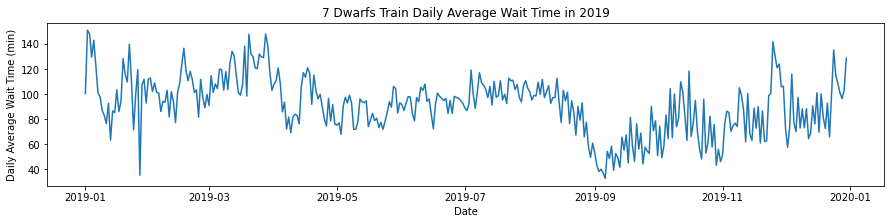

In [216]:
#Separate into each year for Dwarfs Train
DT_daily_avg_wait_time_2015 = DT_daily_avg_wait_time[:365]
DT_daily_avg_wait_time_2016 = DT_daily_avg_wait_time[365:730]
DT_daily_avg_wait_time_2017 = DT_daily_avg_wait_time[730:1093] #this year only has 363 days
DT_daily_avg_wait_time_2018 = DT_daily_avg_wait_time[1093:1458] 
DT_daily_avg_wait_time_2019 = DT_daily_avg_wait_time[1458:] #This year only has 364 days

#Plot for most recent year
plt.figure(figsize=(15,3))
plt.plot(DT_daily_avg_wait_time_2019)
plt.xlabel('Date')
plt.ylabel('Daily Average Wait Time (min)')
plt.title('7 Dwarfs Train Daily Average Wait Time in 2019')
plt.show()

This plot isn't that helpful, but does point out some interesting peaks and troughs. 

It might be more telling to visualize the wait times for 2019 using a histogram. 

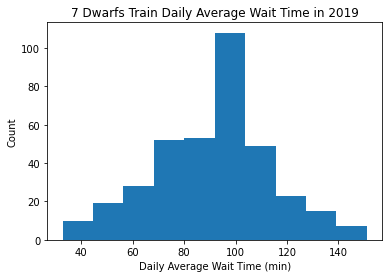

In [217]:
#Histogram for daily average wait in 2019
plt.hist(DT_daily_avg_wait_time_2019)
plt.xlabel('Daily Average Wait Time (min)')
plt.ylabel('Count')
plt.title('7 Dwarfs Train Daily Average Wait Time in 2019')
plt.show()

The histogram above clearly shows the most typical hourly average wait time for Dwarfs Train in 2019 was around the 100 minute range. 

#### 3. To further anaylyze the average hourly wait time for each day in 2019, I took a look at the minimum and maximum times and what days these occur on. In addition, I got the mean and standard deviation. 

In [218]:
#Get days with lowest and highest daily average wait for 2019
min_wait = DT_daily_avg_wait_time_2019.min()
max_wait = DT_daily_avg_wait_time_2019.max()
min_wait_day = DT_daily_avg_wait_time_2019.reset_index()[DT_daily_avg_wait_time_2019.reset_index().DT_wait_time == min_wait].date.item()
max_wait_day = DT_daily_avg_wait_time_2019.reset_index()[DT_daily_avg_wait_time_2019.reset_index().DT_wait_time == max_wait].date.item()


#Get mean and std for average daily wait for 2019
mean_wait = DT_daily_avg_wait_time_2019.mean()
wait_std = DT_daily_avg_wait_time_2019.std()

print('Minimum wait time = {:.2f} minutes'.format(min_wait))
print('Minimum wait time date = {}'.format(min_wait_day))
print('\n')
print('Maximum wait time = {:.2f} minutes'.format(max_wait))
print('Maximum wait time date = {}'.format(max_wait_day))
print('\n')
print('Mean wait time = {:.2f} minutes'.format(mean_wait))

Minimum wait time = 32.69 minutes
Minimum wait time date = 2019-09-06


Maximum wait time = 151.09 minutes
Maximum wait time date = 2019-01-02


Mean wait time = 91.31 minutes


#### 4. To get a quick sense of how wait times have changed from year to year, I took the mean of the average hourly wait for each day of every year. These can be seen below. 

In [219]:
#Compare mean wait times for each year
mean2015 = DT_daily_avg_wait_time_2015.mean()
mean2016 = DT_daily_avg_wait_time_2016.mean()
mean2017 = DT_daily_avg_wait_time_2017.mean()
mean2018 = DT_daily_avg_wait_time_2018.mean()
mean2019 = DT_daily_avg_wait_time_2019.mean()

print('Mean Wait Time for 2015: {:.2f} minutes'.format(mean2015))
print('Mean Wait Time for 2016: {:.2f} minutes'.format(mean2016))
print('Mean Wait Time for 2017: {:.2f} minutes'.format(mean2017))
print('Mean Wait Time for 2018: {:.2f} minutes'.format(mean2018))
print('Mean Wait Time for 2019: {:.2f} minutes'.format(mean2019))

Mean Wait Time for 2015: 72.84 minutes
Mean Wait Time for 2016: 78.40 minutes
Mean Wait Time for 2017: 89.95 minutes
Mean Wait Time for 2018: 93.25 minutes
Mean Wait Time for 2019: 91.31 minutes


Overall, wait times have increased year over year, with the exception from 2018 to 2019, where the average hourly wait for each day went down by a couple minutes. 

#### 5. Next, I want to use the holiday data inside the metadata to see what effects holidays have on wait times. 

In [220]:
#Compare daily avg wait time of Dwarfs Train with if there's a holiday or not

#Merge holiday data with Dwarfs Train wait time 2019
holiday_data = pd.merge(DT_daily_avg_wait_time_2019, metadata_final[['date','HOLIDAY']],on='date')

#Compare on or not on holiday mean
on_holiday_data = holiday_data[holiday_data.HOLIDAY == 1]
not_holiday_data = holiday_data[holiday_data.HOLIDAY == 0]

holiday_mean_wait = on_holiday_data.DT_wait_time.mean()
not_holiday_mean_wait = not_holiday_data.DT_wait_time.mean()

#Which holiday has highest daily average wait
most_crowded = on_holiday_data[on_holiday_data.DT_wait_time == on_holiday_data.DT_wait_time.max()].date.item()

print('Average hourly wait for a holiday: {:.2f} minutes'.format(holiday_mean_wait))
print('Average hourly wait for not a holiday: {:.2f} minutes'.format(not_holiday_mean_wait))
print('Most crowded holiday date: {}'.format(most_crowded))

Average hourly wait for a holiday: 94.31 minutes
Average hourly wait for not a holiday: 90.96 minutes
Most crowded holiday date: 2019-12-24


As seen above, the average hourly wait per day is slightly higher on days when there is a holiday. The holiday with the highest average hourly wait time is 12/24/2019, which is Christmas Eve. 

#### 6. Next, I began to get an idea for what day of the week and what month of the year has the highest average hourly wait time per day. 

In [222]:
#Daily mean vs Day of week, month of year

#Merge dwarfs train daily average data with metadata columns day of week and month of year; merge on date
weekday_month_data = pd.merge(DT_daily_avg_wait_time, metadata_final[['date','DAYOFWEEK','MONTHOFYEAR']],on='date')

#Group by day of week and get mean wait time
weekday_data = weekday_month_data.groupby('DAYOFWEEK').DT_wait_time
weekday_data_mean = weekday_data.mean().round(2)

weekday_data_mean

DAYOFWEEK
1    81.53
2    89.08
3    83.40
4    88.61
5    81.49
6    81.25
7    90.63
Name: DT_wait_time, dtype: float64

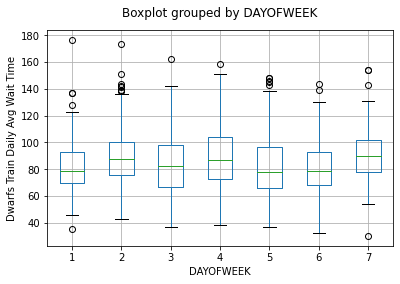

In [224]:
#Boxplots grouped by day of week
weekday_month_data.boxplot(column='DT_wait_time', by='DAYOFWEEK')
plt.ylabel('Dwarfs Train Daily Avg Wait Time')
plt.title('')
plt.show()

From the above analysis, the days of the week are pretty close in average hourly wait time, but Friday has the highest. 

In [223]:
#Group by month of year and get mean
month_data = weekday_month_data.groupby('MONTHOFYEAR').DT_wait_time
month_data_mean = month_data.mean().round(2)

month_data_mean

MONTHOFYEAR
1     89.14
2     88.07
3     95.71
4     86.77
5     80.26
6     88.91
7     90.82
8     83.82
9     64.11
10    77.12
11    84.46
12    91.96
Name: DT_wait_time, dtype: float64

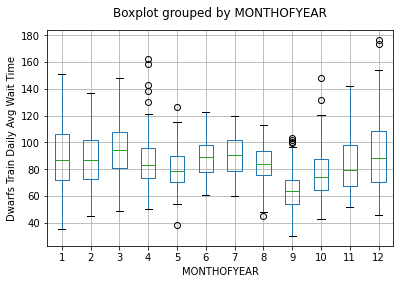

In [225]:
#Boxplots grouped by month
weekday_month_data.boxplot(column='DT_wait_time', by='MONTHOFYEAR')
plt.ylabel('Dwarfs Train Daily Avg Wait Time')
plt.title('')
plt.show()

The average hourly wait time per day of every month is a bit more spread. Based on this analysis, March has the highest average hourly wait times per day. 

#### 7. Another thing I took a look at was what the average hourly wait was depending on what hour of the day it was. 

In [226]:
#Mean wait vs hour of day

#Group by hour of day for rides in Magic Kingdom
mk_byhour_data =  mk_final.groupby('hour_of_day').mean()
mk_byhour_data

,DT_wait_time,POC_wait_time,SM_wait_time
hour_of_day,,,
6.0,50.750000,5.000000,5.000000
7.0,57.892500,7.187500,6.160000
8.0,48.939449,6.835963,6.804588
9.0,61.717106,10.820957,12.742464
10.0,78.101936,25.457085,34.701591
11.0,89.186340,37.314024,50.204256
12.0,94.328166,39.807819,60.109348
13.0,98.202720,40.300159,65.525913
14.0,99.718042,38.277194,62.410391


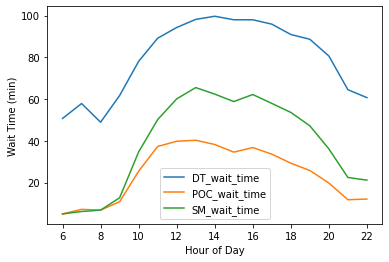

In [227]:
#Line plot per day to show hours
plt.plot(mk_byhour_data)
plt.legend(labels=('DT_wait_time', 'POC_wait_time', 'SM_wait_time'))
plt.xlabel('Hour of Day')
plt.ylabel('Wait Time (min)')
plt.show()

From the data and plot above, it is clear that the average hourly wait time is highest in the middle of the day for each attraction.

#### 8. The next relationship I consider is average hourly wait time per day vs. the weather. The two weather variables I use are the mean temperature for WDW on a given day and the historial precipitation in WDW that day. 

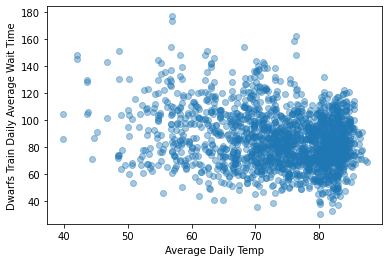

In [229]:
weather_data = pd.merge(DT_daily_avg_wait_time, metadata_final[['date','WDWMEANTEMP','WEATHER_WDWPRECIP']],on='date')

#Compare to daily temp at WDW
plt.scatter(weather_data.WDWMEANTEMP, weather_data.DT_wait_time, alpha=0.4)
plt.xlabel('Average Daily Temp')
plt.ylabel('Dwarfs Train Daily Average Wait Time')
plt.show()

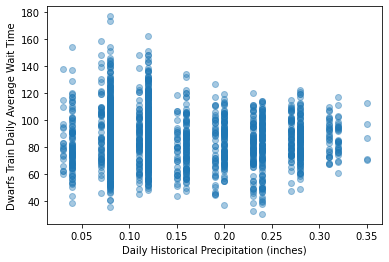

In [230]:
#Compare to weather precip
plt.scatter(weather_data.WEATHER_WDWPRECIP, weather_data.DT_wait_time, alpha=0.4)
plt.xlabel('Daily Historical Precipitation (inches)')
plt.ylabel('Dwarfs Train Daily Average Wait Time')
plt.show()

The scatterplots above don't show too strong of a relationship, but I plan to look at this further in my project. 

#### 9. The last variable I want to look at is the percentage of schools in session and see if that has any effect on average hourly wait time per day. 

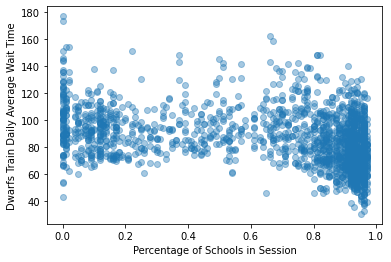

In [231]:
#Wait time vs. Percentage of schools in session
school_data = pd.merge(DT_daily_avg_wait_time, metadata_final[['date','inSession']],on='date')

plt.scatter(school_data.inSession, school_data.DT_wait_time, alpha=0.4)
plt.xlabel('Percentage of Schools in Session')
plt.ylabel('Dwarfs Train Daily Average Wait Time')
plt.show()

From the scatterplot above, there seems to be some relationship. When less schools are in session, wait times look to be a little higher and vice versa. I will look at this further as the project goes on.

## VI. Questions for Reviewers

Questions I have:
 - Is it possible to make some of my data cleaning more succinct by using functions? I struggled since I needed to create new names for each dataset. 
 - What variables do you think will be the most interesting to look at?
 - Should I only focus on one attraction?
 - What should I do if I don't know the answer to some of the data description questions?